In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv('../data/bs_eda.csv')
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 7032
Number of columns in the dataset: 27


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Senior Citizen                            7032 non-null   bool   
 1   Partner                                   7032 non-null   bool   
 2   Dependents                                7032 non-null   bool   
 3   Tenure                                    7032 non-null   int64  
 4   Phone Service                             7032 non-null   bool   
 5   Multiple Lines                            7032 non-null   bool   
 6   Online Security                           7032 non-null   bool   
 7   Online Backup                             7032 non-null   bool   
 8   Device Protection                         7032 non-null   bool   
 9   Tech Support                              7032 non-null   bool   
 10  Streaming TV                        

In [11]:
df = df.astype({col:'int' for col in df.select_dtypes('bool').columns})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Senior Citizen                            7032 non-null   int64  
 1   Partner                                   7032 non-null   int64  
 2   Dependents                                7032 non-null   int64  
 3   Tenure                                    7032 non-null   int64  
 4   Phone Service                             7032 non-null   int64  
 5   Multiple Lines                            7032 non-null   int64  
 6   Online Security                           7032 non-null   int64  
 7   Online Backup                             7032 non-null   int64  
 8   Device Protection                         7032 non-null   int64  
 9   Tech Support                              7032 non-null   int64  
 10  Streaming TV                        

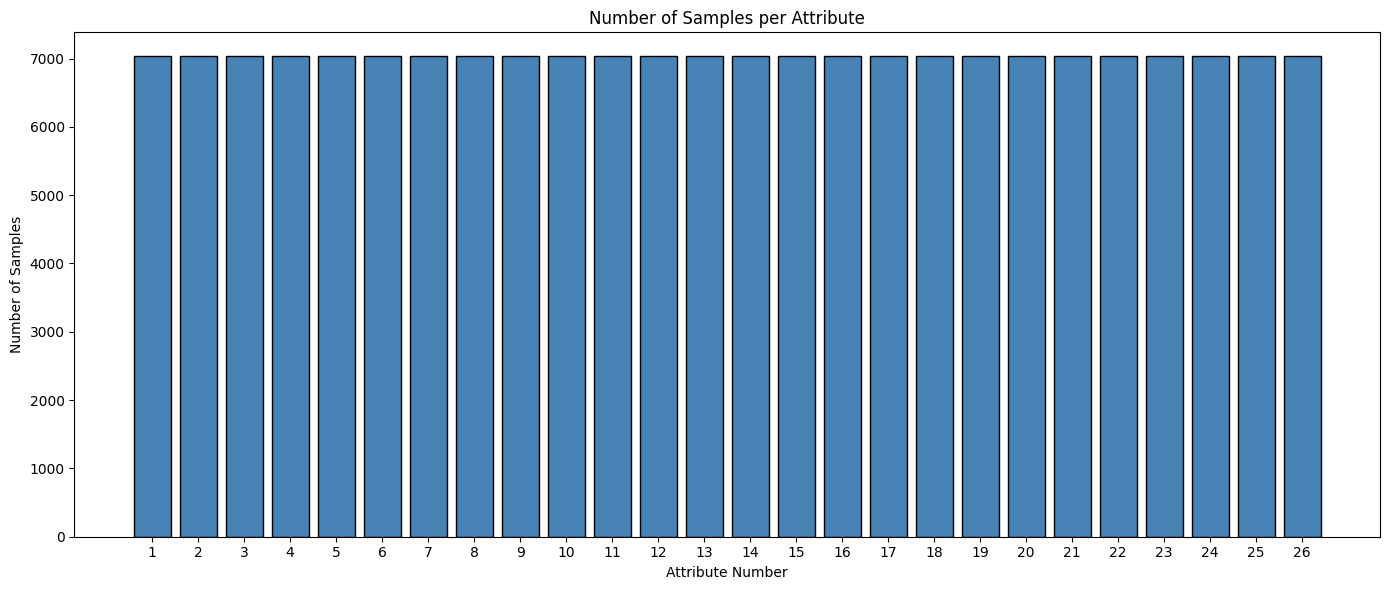

,Attribute Number,Attribute Name
0,1,Senior Citizen
1,2,Partner
2,3,Dependents
3,4,Tenure
4,5,Phone Service
5,6,Multiple Lines
6,7,Online Security
7,8,Online Backup
8,9,Device Protection
9,10,Tech Support


In [21]:

# Get sample counts per column
sample_counts = df.count()

# Create a numeric index
numeric_labels = list(range(1, len(sample_counts) + 1))

# Plot
plt.figure(figsize=(14, 6))
plt.bar(numeric_labels, sample_counts.values, edgecolor='black', color='steelblue')
plt.title("Number of Samples per Attribute")
plt.xlabel("Attribute Number")
plt.ylabel("Number of Samples")
plt.xticks(numeric_labels)
plt.tight_layout()
plt.show()

# Create and display lookup table
attribute_table = pd.DataFrame({
    "Attribute Number": numeric_labels,
    "Attribute Name": sample_counts.index
})



display(attribute_table)



In [19]:
unique_counts = df.nunique().sort_values(ascending=False)

# Display nicely
unique_table = pd.DataFrame({
    "Attribute": unique_counts.index,
    "Unique Options": unique_counts.values
})

display(unique_table)

,Attribute,Unique Options
0,Total Charges,6530
1,Monthly Charges,1584
2,Tenure,72
3,Dependents,2
4,Partner,2
5,Multiple Lines,2
6,Online Security,2
7,Online Backup,2
8,Phone Service,2
9,Senior Citizen,2


In [23]:
# Example for 'Payment Method'
print(df['Tech Support'].value_counts())


Tech Support
0    4992
1    2040
Name: count, dtype: int64


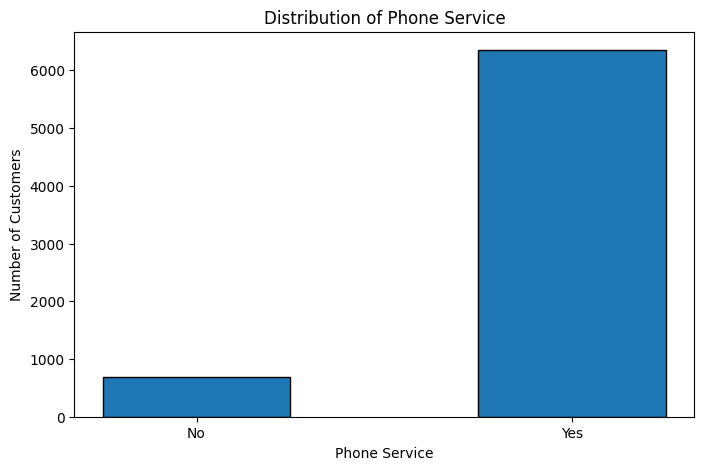

In [48]:
phone_counts = df['Phone Service'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar([0, 1], phone_counts, width=0.5, edgecolor='black')  
plt.xticks([0, 1])
plt.title('Distribution of Phone Service')
plt.xlabel('Phone Service')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Number of Customers')
plt.show()

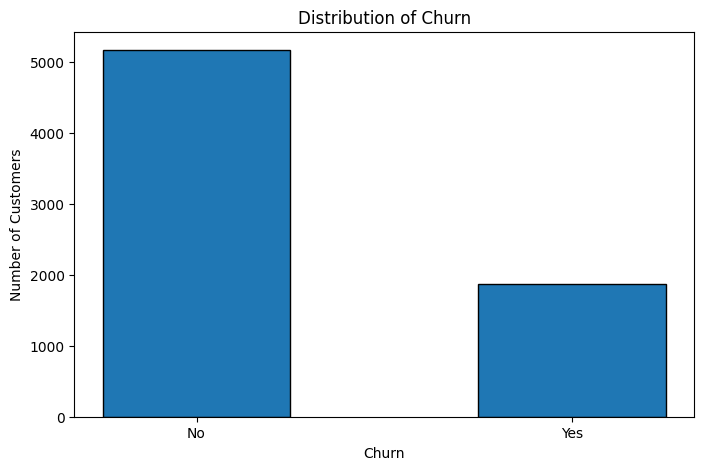

In [49]:
churn_counts = df['Churn'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar([0, 1], churn_counts, width=0.5, edgecolor='black')  
plt.xticks([0, 1])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

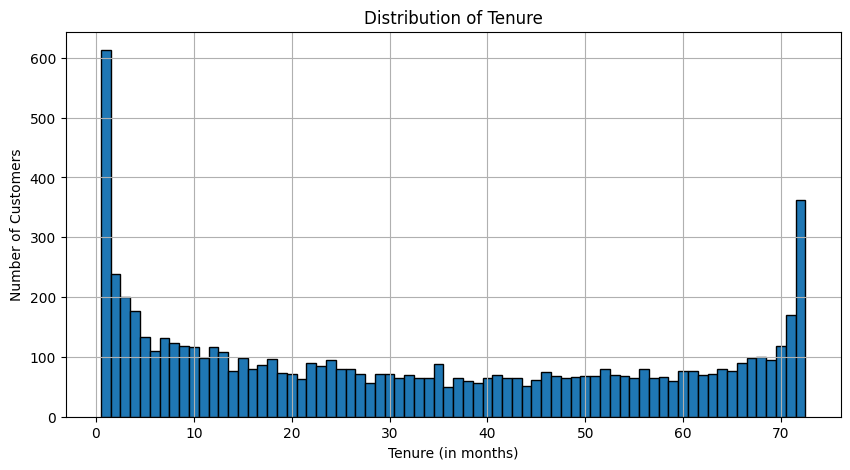

In [33]:
tenure_counts = df['Tenure'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(tenure_counts.index, tenure_counts.values, width=1.0, edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


Bin ranges for Total Charges:
Bin 1: 18.80 to 2185.30 = 4305 customers
Bin 2: 2185.30 to 4351.80 = 1265 customers
Bin 3: 4351.80 to 6518.30 = 970 customers
Bin 4: 6518.30 to 8684.80 = 492 customers


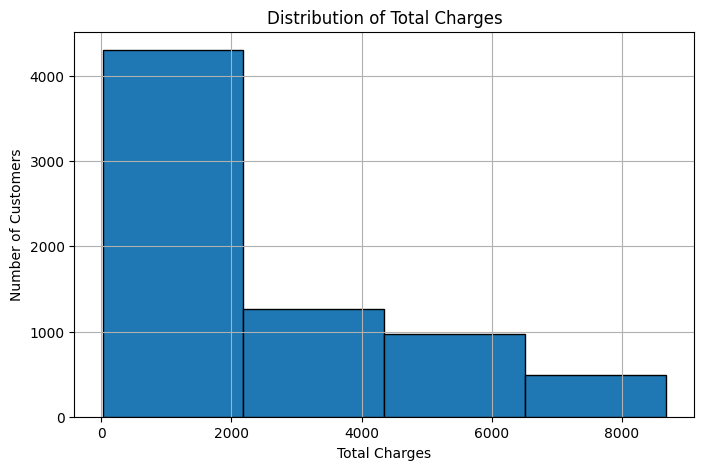

In [46]:
counts, bin_edges = np.histogram(df['Total Charges'], bins=4)  

# Print bin ranges 
print("Bin ranges for Total Charges:")
for i in range(len(counts)):
    print(f"Bin {i+1}: {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f} = {counts[i]} customers")

# Plot
plt.figure(figsize=(8, 5))
plt.hist(df['Total Charges'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


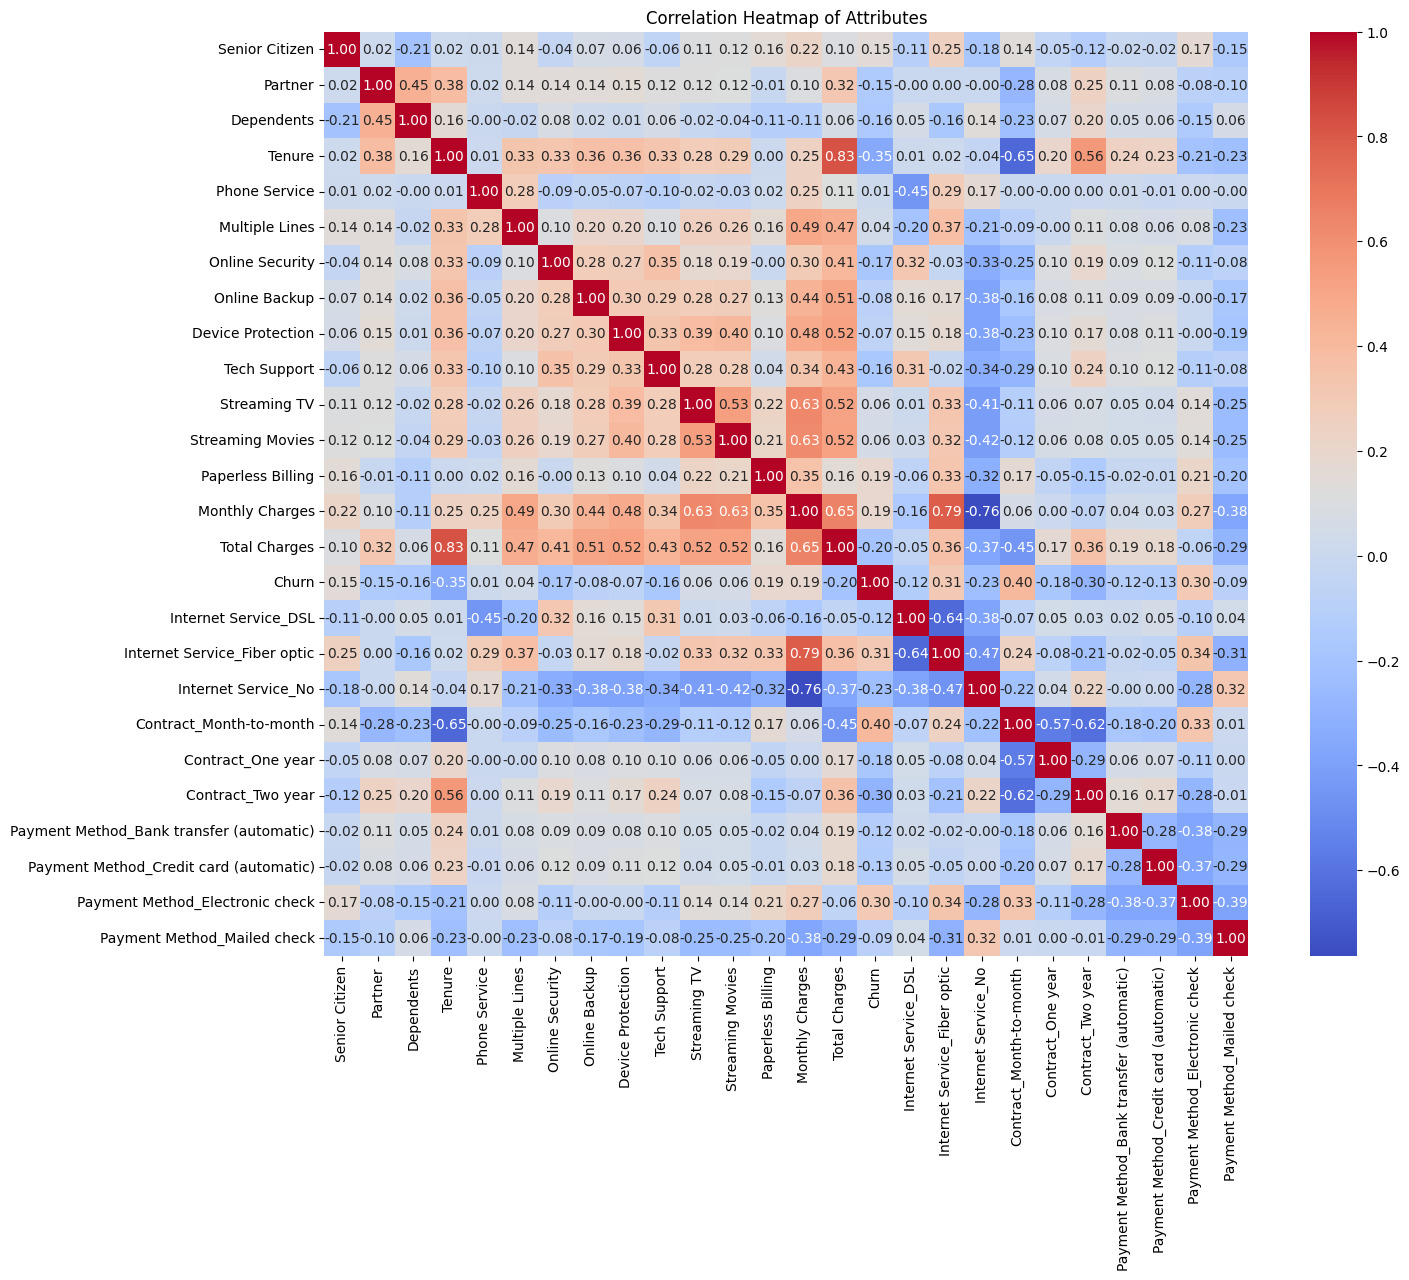

In [50]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Attributes")
plt.show()
